Sampling single mode initial states using methods presented in the article
- [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://doi.org/10.1016/j.optcom.2009.06.033); errata [Olsen, Lewis-Swan, Bradley, Opt. Comm. 370 (2016) 327-328](https://doi.org/10.1016/j.optcom.2016.02.068)

We also sample some new distributions:
- fock state for +W
- thermal state for +P

In [1]:
using PhaseSpaceTools, PyPlot

INFO: Recompiling stale cache file /Users/abradley/.julia/lib/v0.6/DataStructures.ji for module DataStructures.
INFO: Recompiling stale cache file /Users/abradley/.julia/lib/v0.6/Revise.ji for module Revise.
INFO: Recompiling stale cache file /Users/abradley/.julia/lib/v0.6/PhaseSpaceTools.ji for module PhaseSpaceTools.


In [3]:
?coherent

search: coherent cohere



```julia
a,ā = coherent(β,N;dist)
```

samples phase space distribution for coherent state

`β` is coherent amplitude (complex)

`N` is number of samples

`dist` is distrubtion. Can be either `+P` or `W`

For a coherent state in +P the distribution is just a point on the complex plane at the position of the coherent amplitude. Default (no value for dist) will give +P


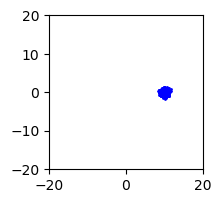

100.29014973589459 + 0.0im


In [4]:
b=10
N=1000
a,ā = coherent(b,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)

In [5]:
?thermal

search: thermal



```julia
a,ā = thermal(β,n̄,N;dist)
```

samples phase space distribution for a thermal state:

`β` is complex displacement

`n̄` is thermal average population

`N` is number of samples

`dist` is the distribution. Can be `P`, `Q` or `W`


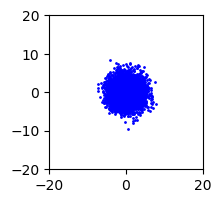

10.074809632335516 + 0.0im

In [6]:
a,ā = thermal(0,10,5000;dist="P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)

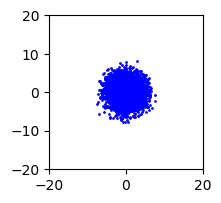

10.21653837226724 + 0.0im

In [7]:
a,ā = thermal(0,10,5000;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)-.5

In [8]:
?squeezed

search: squeezed squeeze



```julia
a,ā = squeezed(β,ϵ,N;dist)
```

samples phase space distribution for a squeezed state

`β` is coherent amplitude

`ϵ` is (complex) squeezing parameter

`N` is number of samples

`dist` is the distribution; can be `W` or `+P`


104.

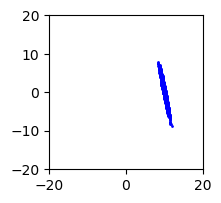

57534276741967 + 0.0im
104.53383099788888


In [9]:
β = 10
ϕ = π/16
r = 1.5
ϵ = r*exp(2*im*ϕ)
N = 10000
a,ā = squeezed(β,ϵ,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(sinh(abs(ϵ)).^2+abs2(β))

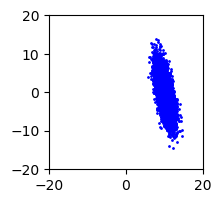

113.58106337179485
113.15411641800824


In [10]:
β = 10
ϕ = π/16
r = 2
ϵ = r*exp(2*im*ϕ)
N = 10000
a,ā = squeezed(β,ϵ,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(real(mean(a.*ā)))
println(sinh(abs(ϵ)).^2+abs2(β))

In [11]:
?fock

search: fock foreach UniformScaling functionloc @functionloc



```julia
a,ā = fock(n,N;dist)
```

samples phase space distribution for a Fock state `n` is number of fock state

`N` is number of samples

`dist` is distribution. Can be either `W`, `+W`, or `+P`(default)


100.

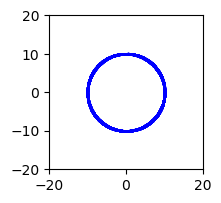

00345744263402 + 0.0im
100


In [12]:
n = 100
N = 10000
a,ā = fock(n,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(n)

  0.002985 seconds (33 allocations: 1.527 MiB)
n = 320
<â⁺â> = 

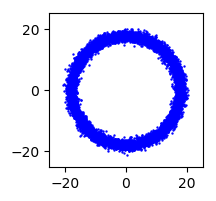

319.90745390526064 + 0.46709790558138936im
V(n̂) = 12.467328448765329 + 3.000773726127818im


In [22]:
n = 320
N = 10000
@time a,ā = fock(n,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
println("n = ", n)
n̄ = mean(ā.*a)
Vn= mean(ā.^2.*a.^2)+mean(ā.*a)-n̄.^2
println("<â⁺â> = ", n̄)
println("V(n̂) = ",Vn)

  0.254900 seconds (51 allocations: 1.778 MiB)
n = 320
<â⁺â> = 

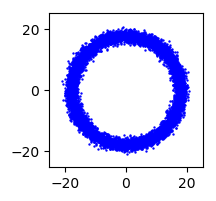

319.6117572042017 + 0.1165902470913105im
V(n̂) = -4.809312057244824 - 1.9445612325883843im


In [21]:
n = 320
N = 10000
@time a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
println("n = ", n)
n̄ = mean(ā.*a)-.5
Vn= mean(ā.^2.*a.^2)-mean(ā.*a)-n̄.^2
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)

  0.004782 seconds (51 allocations: 1.778 MiB)


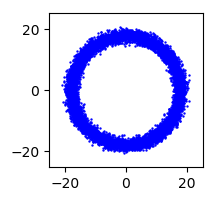

n = 321
<â⁺â> = 321.032897307618 - 0.03196121911483763im
V(n̂) = -1.0107685785624199 + 7.634702092410214im


In [23]:
#for n>320 uses asymptotic expansion
n=321
N=10000
@time a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
println("n = ", n)
n̄ = mean(ā.*a)-.5
Vn= mean(ā.^2.*a.^2)-mean(ā.*a)-n̄.^2
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)

  0.610761 seconds (65 allocations: 161.590 MiB, 44.57% gc time)


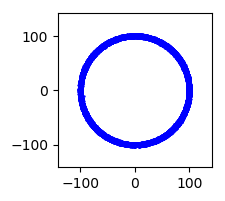

n = 10000
<â⁺â> = 9999.984945939306 - 0.04020787108530793im
V(n̂) = -52.320808455348015 + 7.434351711342629im


In [45]:
#push n and N
n=10000
N=1000000
@time a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
println("n = ", n)
n̄ = mean(ā.*a)-.5
Vn= mean(ā.^2.*a.^2)-mean(ā.*a)-n̄.^2
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)

In [46]:
?crescent

search: crescent



```julia
a,ā = crescent(β,ϵ,q,N;dist)
```

Sample phase space distribution for a crescent state

`β` is coherent amplitude

`ϵ` is squeeze paramter

`q` is shearing parameter

`N` is number of samples

`dist` is distribution. Can be either `Q` or `+P`


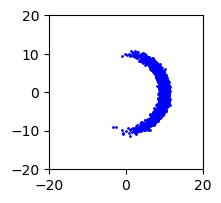

100.15232082438271 + 0.0im
100.0


In [47]:
β = 10
ϵ = 0
q = .5
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
#not quite the right moments for crescent state, but a sanity check of sorts:
println(sinh(abs(ϵ)).^2+abs2(β)) 

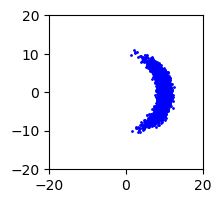

100.18692020512312 + 0.0im
100.0


In [48]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="Q")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-1)
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

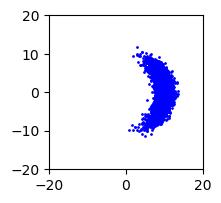

99.62290527412398 - 0.185019617115392im
100.0


In [49]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts